In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy #import dendrogram
import seaborn
from PIL import Image
import matplotlib.colors as colors
import umap
import matplotlib.patches as mpatches
from scipy.stats import chi2_contingency

In [2]:
with open('../data/final_clustering.pkl', 'rb') as f:
    cdat = pickle.load(f)

b = cdat['basis']
m = cdat['metabric']
measure_cols = cdat['measure_cols']
norm_measure_cols = [n + '_n' for n in measure_cols]

In [3]:
# for when you do independent clustering on both cohorts
v = np.concatenate((b[norm_measure_cols].values, m[norm_measure_cols].values), axis=0)
np.random.seed(108)
u = umap.UMAP(n_neighbors=10, n_components=2, 
              metric='cosine',
              min_dist=0.2, 
              n_epochs=400, 
              learning_rate=0.05, 
              local_connectivity=0.5
             ).fit(v)
vt = u.transform(v)
bu = vt[:b.shape[0], :]
mu = vt[b.shape[0]:, :]

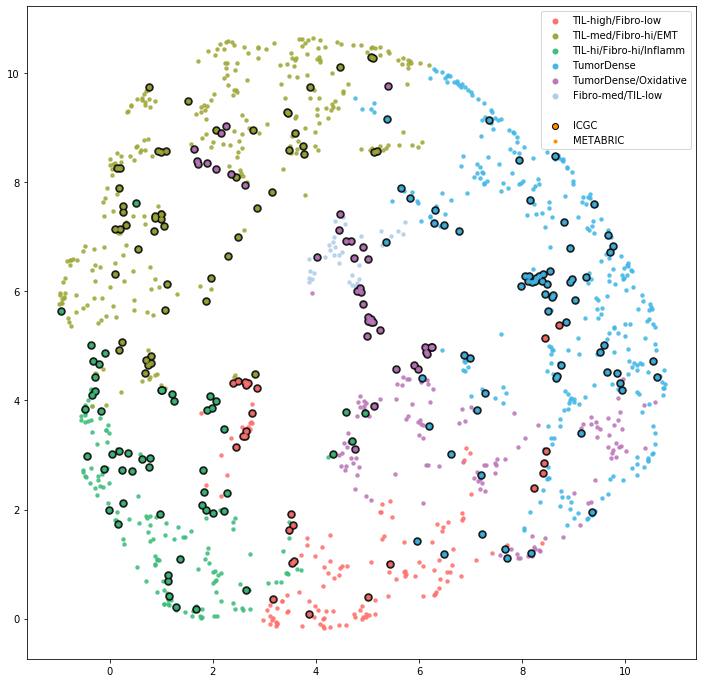

In [4]:
ccol = 'clusters'
save_file = '../figures/fig_umap.png'
cnames = cdat['cluster_names']

fig = plt.figure(figsize=(12, 12))
fig.patch.set_facecolor('white')
legend_extra_color = 'darkorange'

#METABRIC
for c in m[ccol].unique():
    mscatter = mu[m[ccol] == c , :]
    plt.scatter(mscatter[:,0], mscatter[:,1], linewidths=1.5, color=cdat['cluster_colors'][c - 1], alpha=0.8, marker='.')

#ICGC
for c in b[ccol].unique():
    bscatter = bu[b[ccol] == c, :]
    plt.scatter(bscatter[:,0], bscatter[:,1], linewidths=2.5, color='black', alpha=0.9, marker='o')
    plt.scatter(bscatter[:,0], bscatter[:,1], linewidths=2.5, color=cdat['cluster_colors'][c - 1], alpha=0.8, marker='.')


more_handles = [plt.scatter([0], [0], color='white', label=' ', marker='.', linewidths=0)] + [
               plt.scatter([0], [0], color=legend_extra_color, edgecolors='black', label='ICGC', marker='o'), 
               plt.scatter ([0], [0], color=legend_extra_color, label='METABRIC', marker='.')]

fig.axes[0].legend(handles=[plt.scatter([0], [0], color=cdat['cluster_colors'][c - 1], label=cnames[c - 1], 
                                        marker='.', linewidths=3) for c in sorted(m[ccol].unique())] + more_handles)

plt.scatter([0], [0], color='white', marker='o', linewidths=3)
plt.savefig(save_file, facecolor='w', format='png')
plt.show()